<a href="https://colab.research.google.com/github/Superkid0714/GCA_AI-Mini-Project/blob/main/Mini_Project_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 배열
import numpy as np

# 데이터 분석
import pandas as pd

In [ ]:
# Pandas option 정의
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

In [ ]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Jupyter note상에 그래프 결과 포함 매직 명령
%matplotlib inline

# Matplotlib 기본 글꼴 정의
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
import sys

# 노트북이 코랩에서 실행 중인지 체크합니다.
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

#     # 나눔바른고딕 폰트로 설정합니다.
    import matplotlib.pyplot as plt
    plt.rc('font', family='NanumBarunGothic')

#     # 마이너스 기호 표시 오류 수정
    import matplotlib
    matplotlib.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
# 경고 문제 출력 제한
import warnings

warnings.filterwarnings( 'ignore' )

In [ ]:
# Tensorflow
import tensorflow as tf

tf.__version__

'2.15.0'

In [ ]:
# Tensorflow Sequential model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model

In [ ]:
# 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split

In [ ]:
def disp_training( history ):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( accuracy ) + 1 )

    plt.title( '훈련 및 검증 정확도' )
    plt.plot( epochs, history.history[ 'accuracy' ], label = 'accuracy' )
    plt.plot( epochs, history.history[ 'val_accuracy' ], label = 'val_accuracy' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.figure()
    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

In [ ]:
def disp_loss( history ):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( loss ) + 1 )

    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/content/train.csv")

In [ ]:
# 데이터 타입 변환 및 새로운 컬럼 생성
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['year'] = data['timestamp'].dt.year

In [ ]:
# 공급량이 0인 데이터 제거
data = data[data['supply(kg)'] > 0]

In [ ]:
# 품목별, 연도별 평균 가격 계산
avg_price_per_item_year = data.groupby(['item', 'year'])['price(원/kg)'].mean().unstack()

<Figure size 1400x700 with 0 Axes>

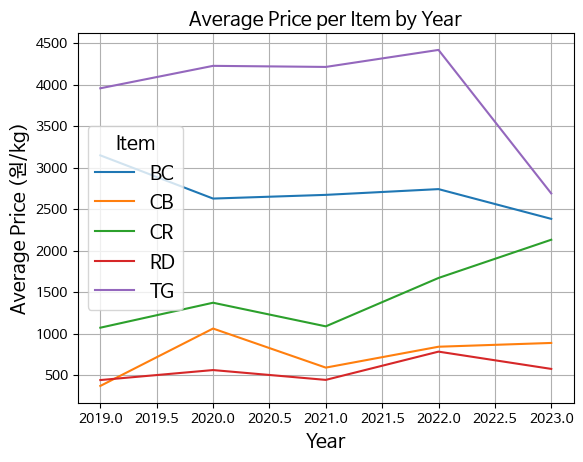

In [ ]:
# 품목별 평균 가격 변화 시각화
plt.figure(figsize=(14, 7))
avg_price_per_item_year.T.plot()
plt.title('Average Price per Item by Year')
plt.xlabel('Year')
plt.ylabel('Average Price (원/kg)')
plt.legend(title='Item')
plt.grid(True)
plt.show()

In [ ]:
# 상품명 리스트
items = data['item'].unique()

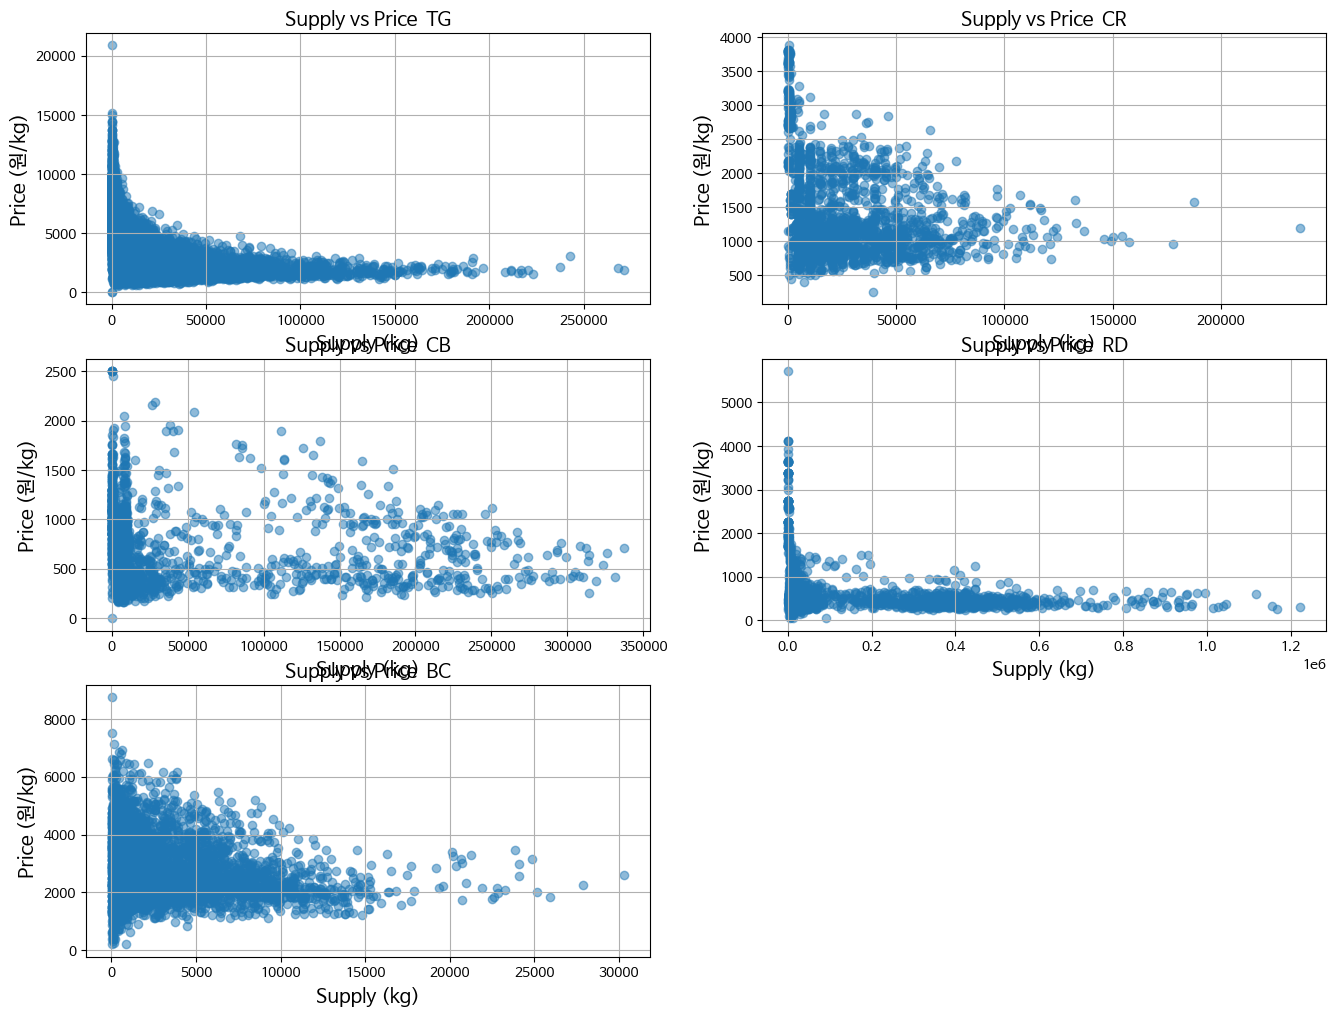

In [ ]:
# 상푸별 공급량과 가격의 관계를 시각화
plt.figure(figsize=(16,12))
for i,item in enumerate(items,1):
  plt.subplot(3,2,i)
  subset = data[data['item'] == item]
  plt.scatter(subset['supply(kg)'], subset['price(원/kg)'], alpha=0.5)
  plt.title(f'Supply vs Price  {item}')
  plt.xlabel('Supply (kg)')
  plt.ylabel('Price (원/kg)')
  plt.grid(True)

<Figure size 1400x700 with 0 Axes>

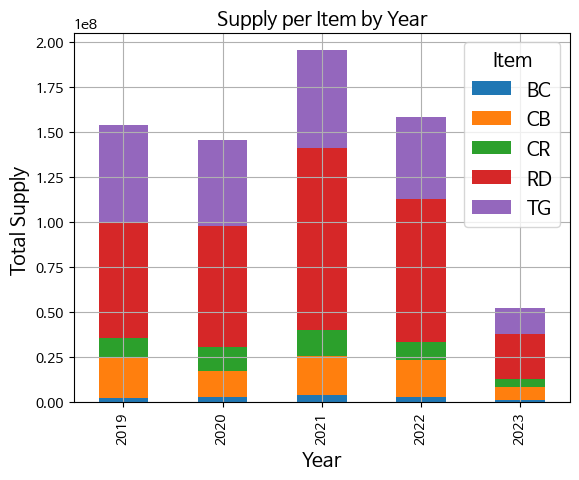

In [ ]:
# 연도별 품목별 공급량 집계
supply_per_item_year = data.groupby(['item', 'year'])['supply(kg)'].sum().unstack()

# 연도별 공급량 변화 시각화
plt.figure(figsize=(14, 7))
supply_per_item_year.T.plot(kind='bar', stacked=True)
plt.title('Supply per Item by Year')
plt.xlabel('Year')
plt.ylabel('Total Supply ')
plt.legend(title='Item')
plt.grid(True)
plt.show()

* 년도별 기업의 아이템별로 평균값 구하기

In [ ]:
# 데이터 연도별, 기업별, 품목별로 그룹화하여 평균 가격 계산
grouped_data = filtered_data.groupby(['year', 'corporation', 'item'])['price(원/kg)'].mean().reset_index()

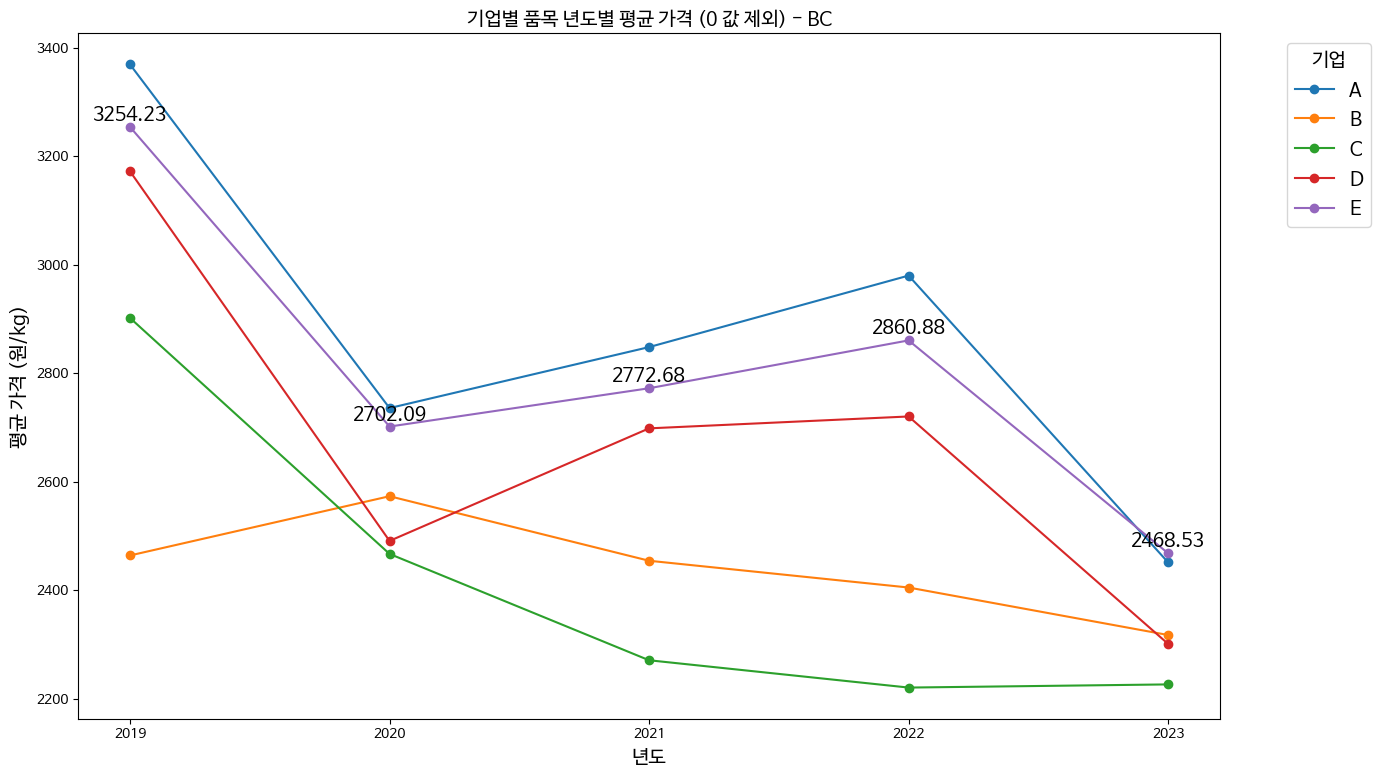

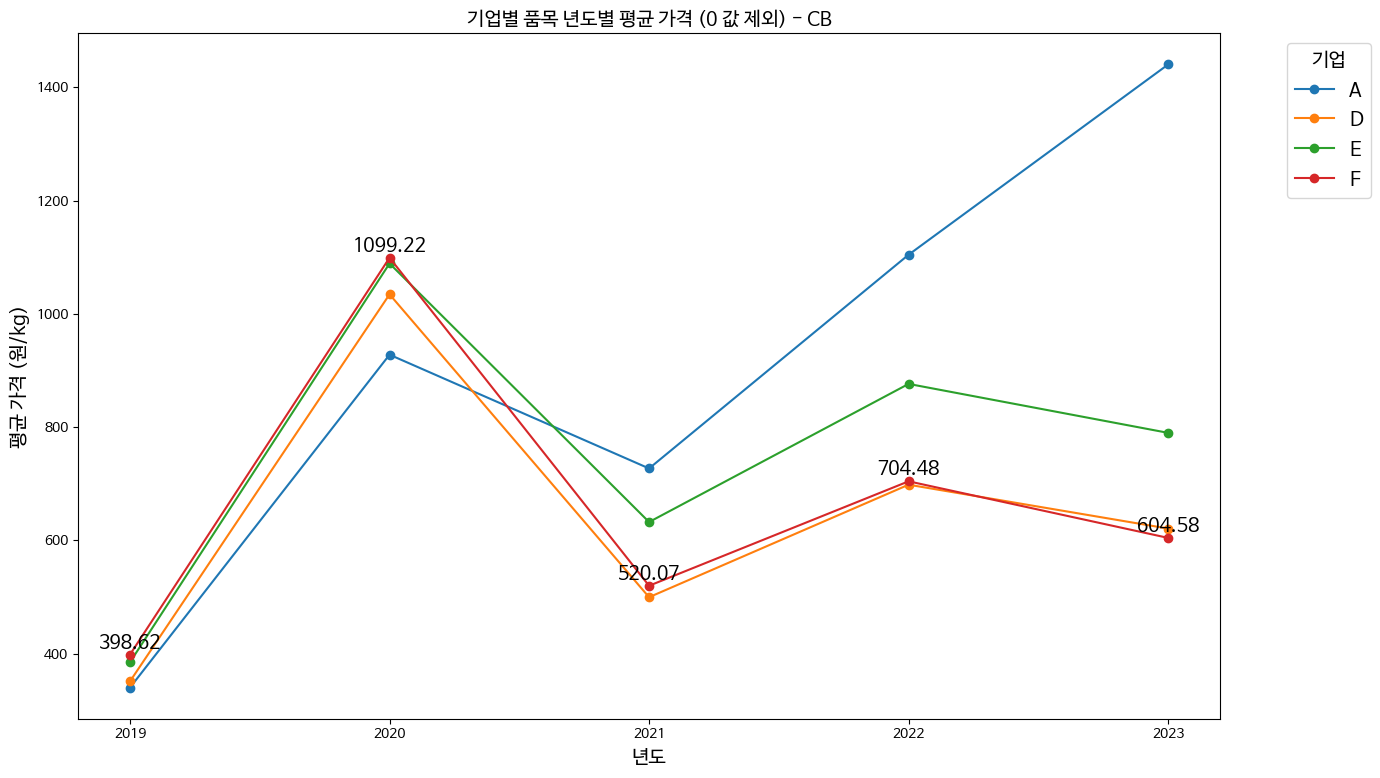

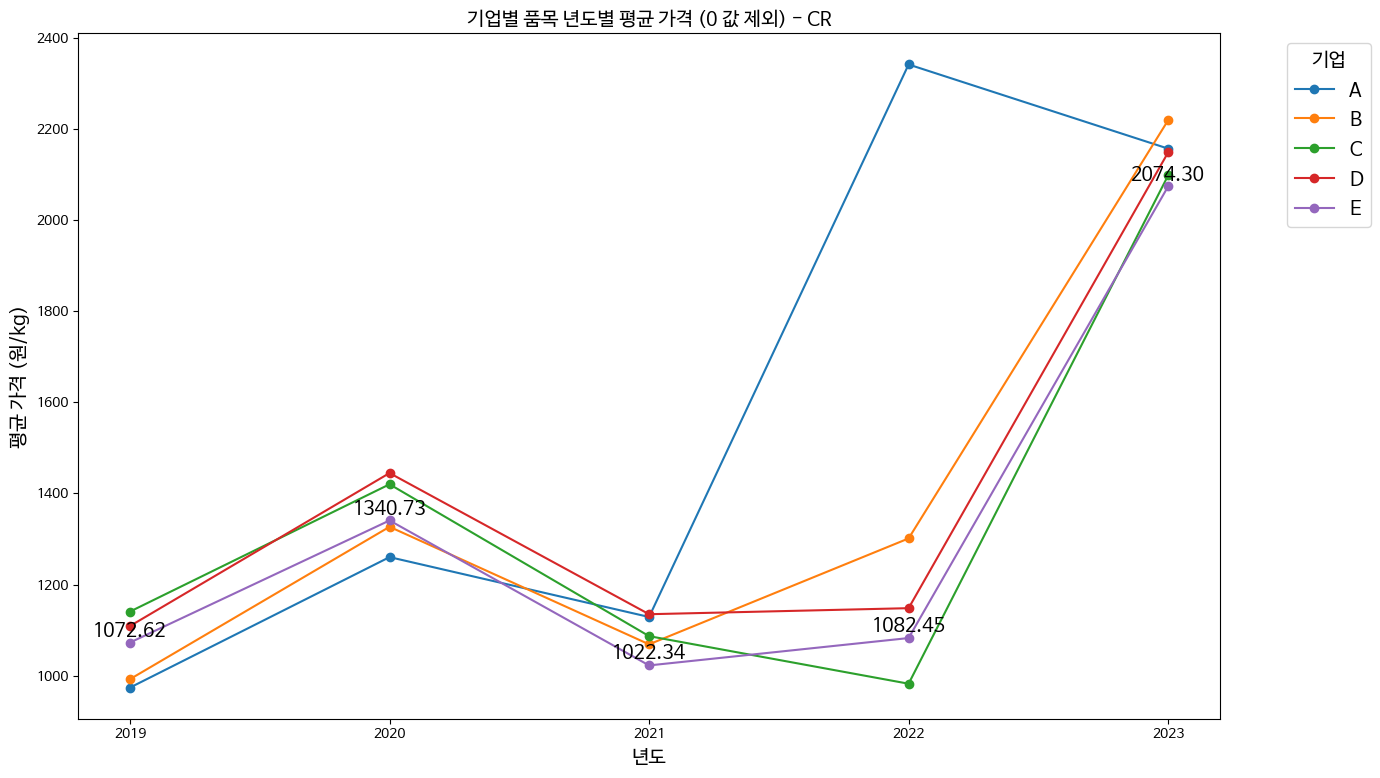

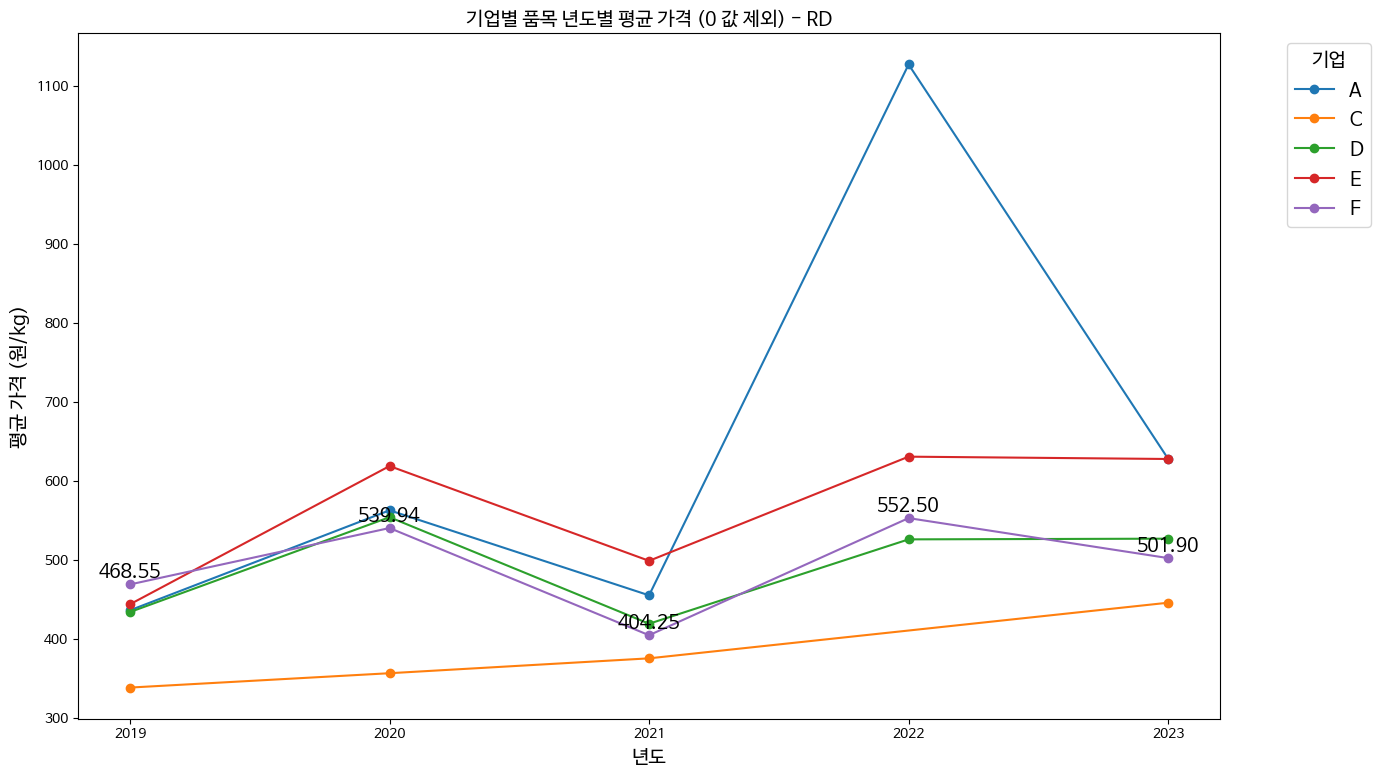

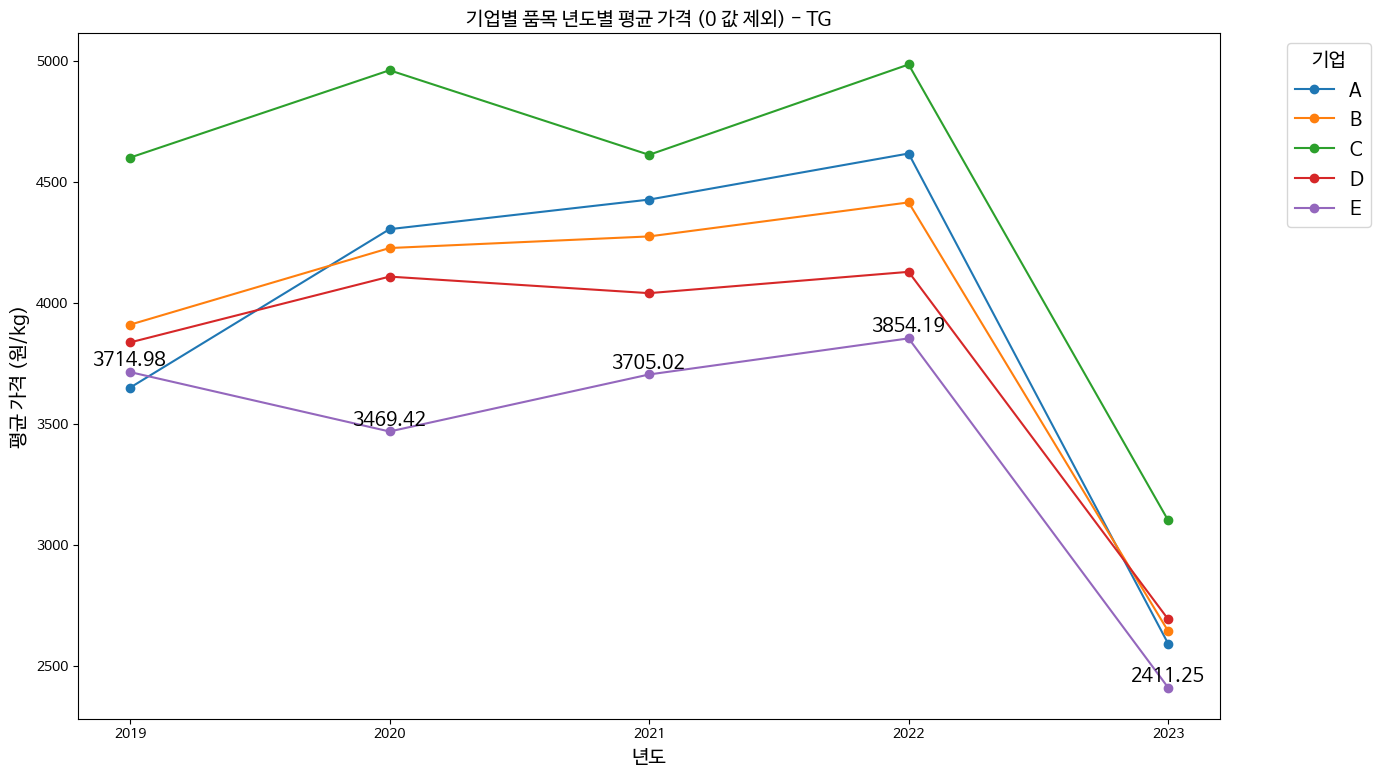

In [ ]:
# 품목별로 그래프 그리기
items = grouped_data['item'].unique()

for item in items:
    fig, ax = plt.subplots(figsize=(14, 8))
    item_data = grouped_data[grouped_data['item'] == item]

    # 각 기업별로 그래프 그리기
    for corporation in item_data['corporation'].unique():
        corp_data = item_data[item_data['corporation'] == corporation]
        ax.plot(corp_data['year'], corp_data['price(원/kg)'], marker='o', label=f'{corporation}')

    # 각 데이터 포인트에 값 표시
    for i, txt in enumerate(corp_data['price(원/kg)']):
        ax.annotate(f'{txt:.2f}', (corp_data['year'].iloc[i], corp_data['price(원/kg)'].iloc[i]),
        textcoords="offset points", xytext=(0,5), ha='center')

    # 그래프 설정
    ax.set_title(f'기업별 품목 년도별 평균 가격 (0 값 제외) - {item}')
    ax.set_xlabel('년도')
    ax.set_ylabel('평균 가격 (원/kg)')
    ax.legend(title='기업', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(grouped_data['year'].unique())

    # 그래프 출력
    plt.tight_layout()
    plt.show()

### 품목별 유통 물량 추이

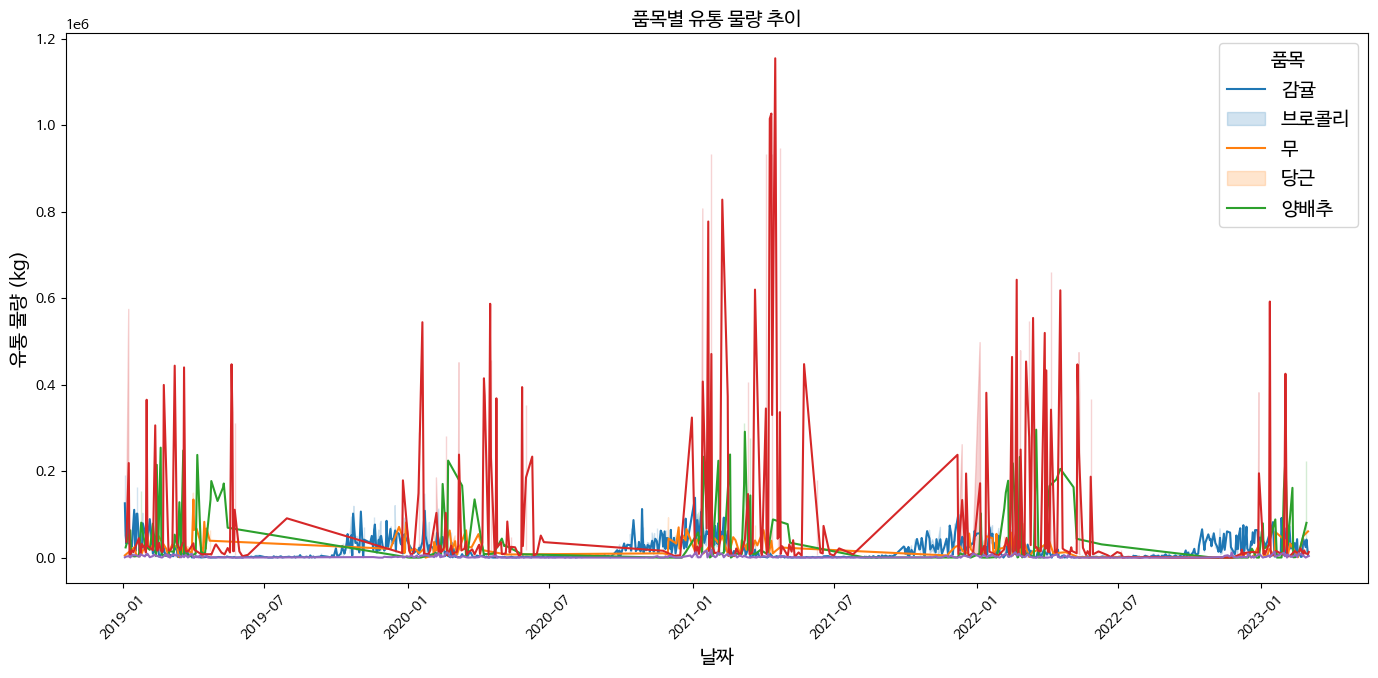

In [ ]:
sampled_data = data.sample(frac=0.1, random_state=1)

# 품목별 유통 물량 추이 시각화
plt.figure(figsize=(14, 7))
sns.lineplot(data=sampled_data, x='timestamp', y='supply(kg)', hue='item')
plt.title('품목별 유통 물량 추이')
plt.xlabel('날짜')
plt.ylabel('유통 물량 (kg)')
plt.legend(title='품목', labels=['감귤', '브로콜리', '무', '당근', '양배추'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

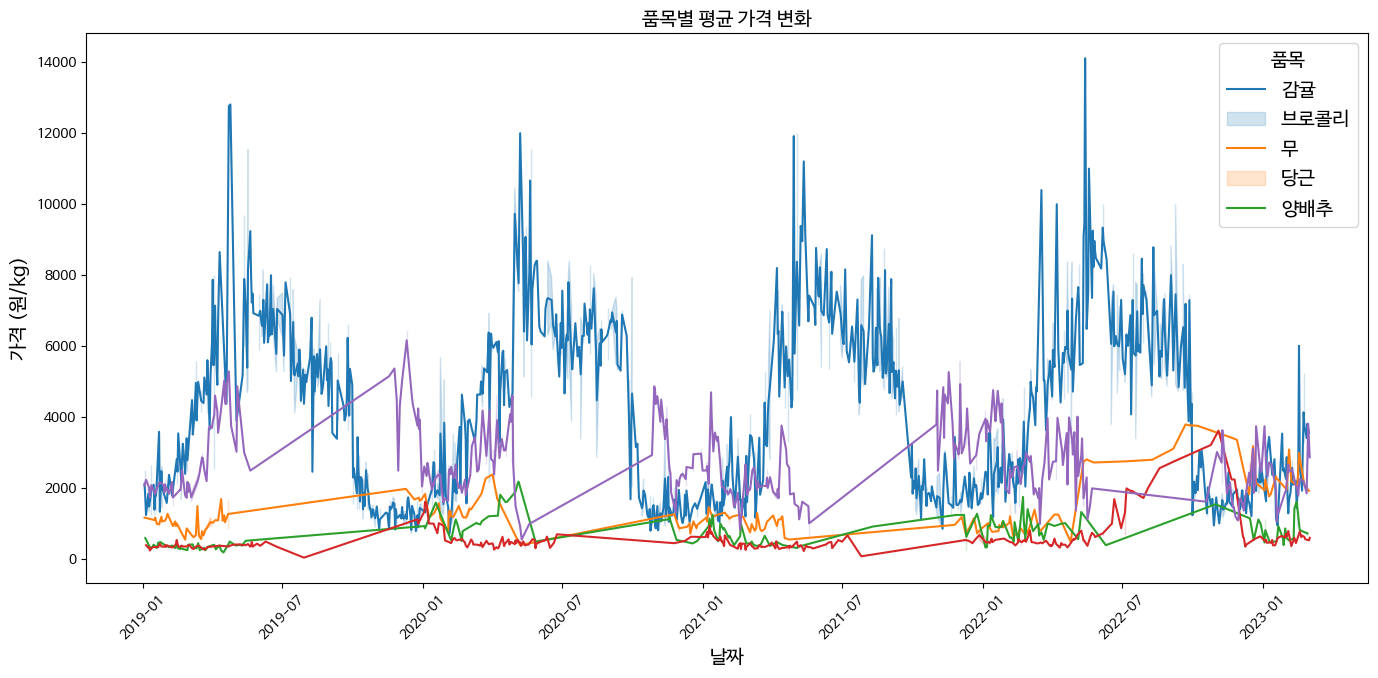

In [ ]:
# 품목별 평균 가격 변화 시각화
plt.figure(figsize=(14, 7))
sns.lineplot(data=sampled_data, x='timestamp', y='price(원/kg)', hue='item')
plt.title('품목별 평균 가격 변화')
plt.xlabel('날짜')
plt.ylabel('가격 (원/kg)')
plt.legend(title='품목', labels=['감귤', '브로콜리', '무', '당근', '양배추'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

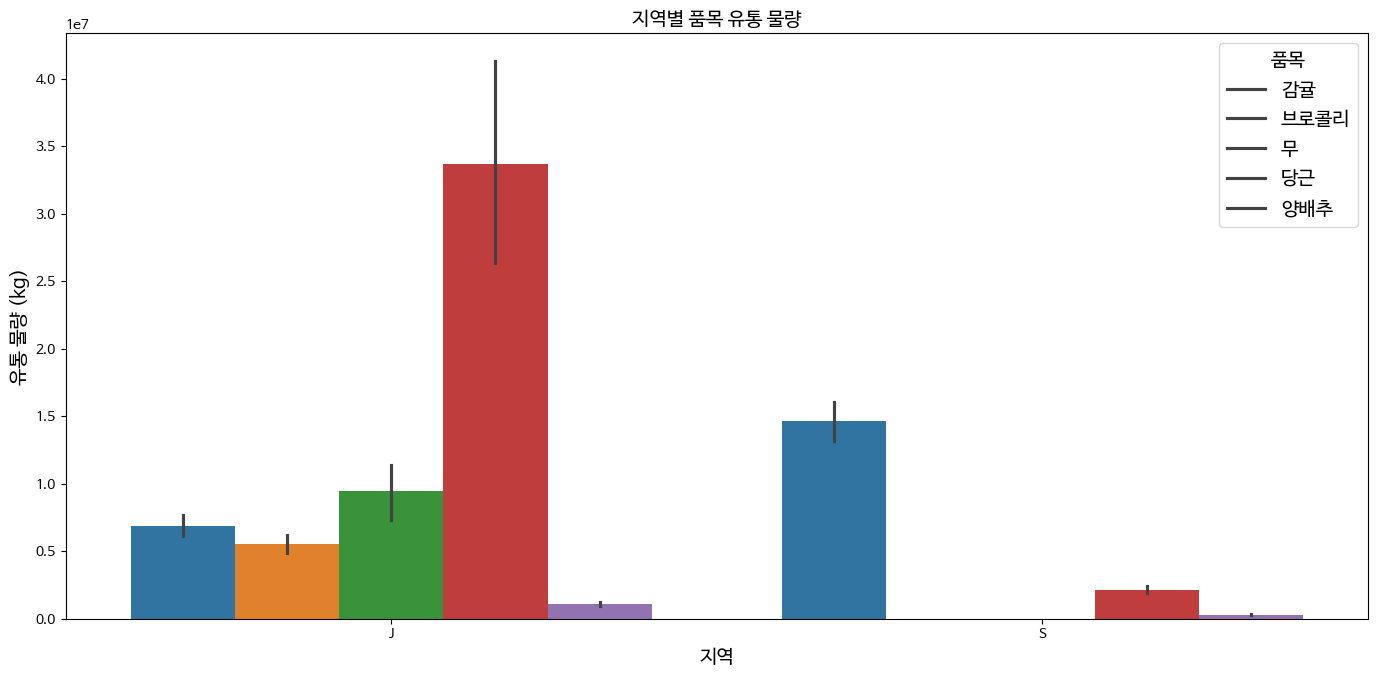

In [ ]:
# 지역별 품목 유통 물량 시각화
plt.figure(figsize=(14, 7))
sns.barplot(data=sampled_data, x='location', y='supply(kg)', hue='item', estimator=sum)
plt.title('지역별 품목 유통 물량')
plt.xlabel('지역')
plt.ylabel('유통 물량 (kg)')
plt.legend(title='품목', labels=['감귤', '브로콜리', '무', '당근', '양배추'])
plt.tight_layout()
plt.show()

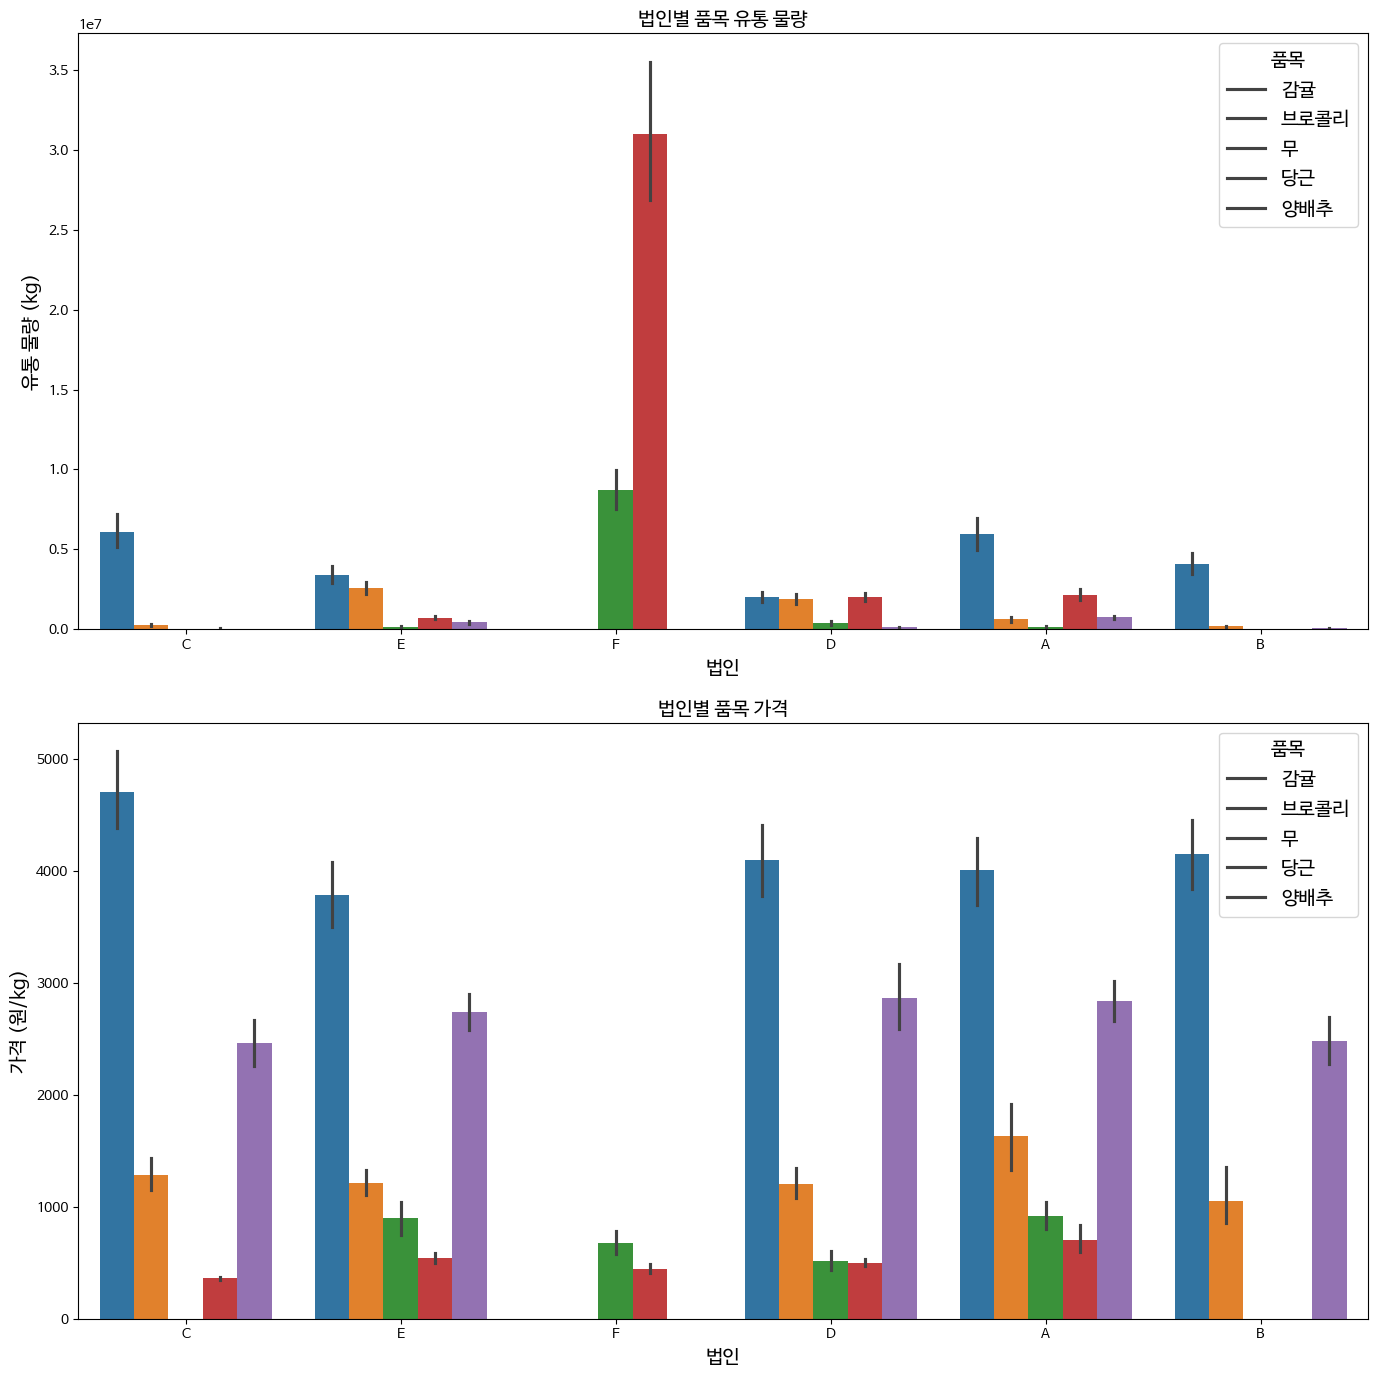

In [ ]:
# 법인별 품목 유통 물량 및 가격 시각화
fig, axes = plt.subplots(2, 1, figsize=(14, 14))

sns.barplot(data=sampled_data, x='corporation', y='supply(kg)', hue='item', estimator=sum, ax=axes[0])
axes[0].set_title('법인별 품목 유통 물량')
axes[0].set_xlabel('법인')
axes[0].set_ylabel('유통 물량 (kg)')
axes[0].legend(title='품목', labels=['감귤', '브로콜리', '무', '당근', '양배추'])

sns.barplot(data=sampled_data, x='corporation', y='price(원/kg)', hue='item', estimator=np.mean, ax=axes[1])
axes[1].set_title('법인별 품목 가격')
axes[1].set_xlabel('법인')
axes[1].set_ylabel('가격 (원/kg)')
axes[1].legend(title='품목', labels=['감귤', '브로콜리', '무', '당근', '양배추'])

plt.tight_layout()
plt.show()

## 무역데이터 중 감귤

In [ ]:
data = pd.read_csv("international_trade.csv")

In [ ]:
# 감귤 데이터 필터링
TG_data = international_data[international_data['품목명'].str.contains('감귤')]

In [ ]:
# 기간을 datetime 형식으로 변환
TG_data['기간'] = pd.to_datetime(TG_data['기간'],format='%Y-%m')

In [ ]:
# 데이터 요약
TG_summary = TG_data.groupby('기간').sum().reset_index()

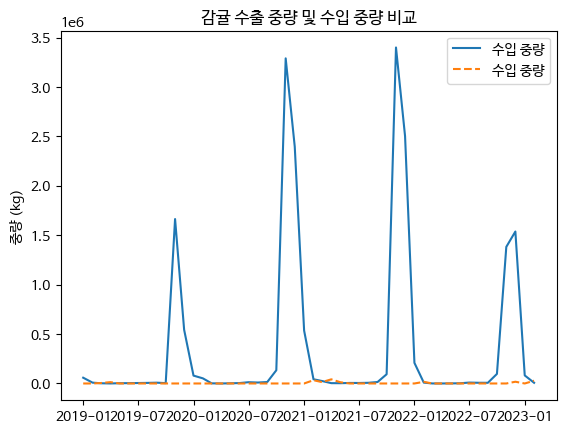

In [ ]:
# 수출 중량 및 수입 중량 비교
plt.plot(TG_summary['기간'],TG_summary['수출 중량'],label = '수입 중량')
plt.plot(TG_summary['기간'], TG_summary['수입 중량'], linestyle='--', label='수입 중량')
plt.title('감귤 수출 중량 및 수입 중량 비교')
plt.ylabel('중량 (kg)')
plt.legend()

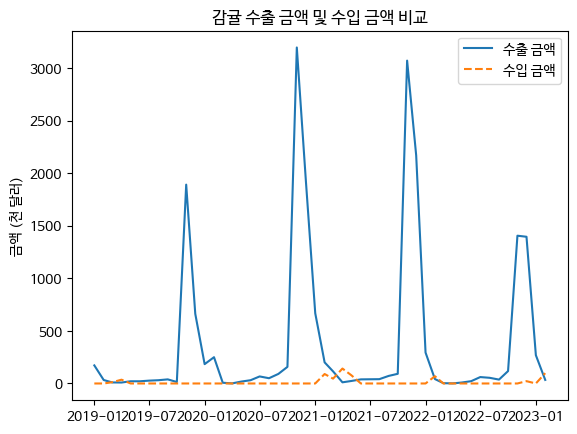

In [ ]:
# 수출 금액 및 수입 금액 비교
plt.plot(TG_summary['기간'], TG_summary['수출 금액'], label='수출 금액')
plt.plot(TG_summary['기간'], TG_summary['수입 금액'], linestyle='--', label='수입 금액')
plt.title('감귤 수출 금액 및 수입 금액 비교')
plt.ylabel('금액 (천 달러)')
plt.legend()

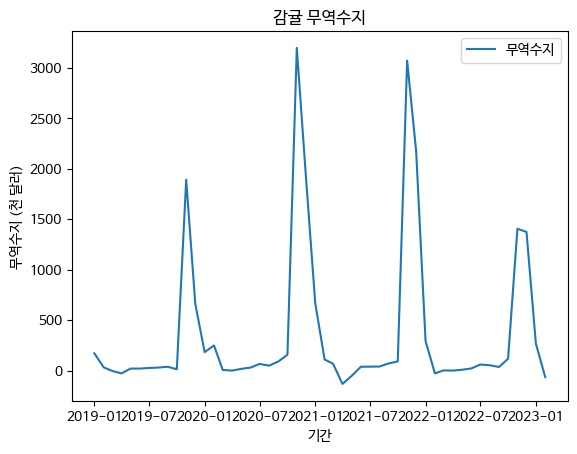

In [ ]:
# 무역수지
plt.plot(TG_summary['기간'], TG_summary['무역수지'], label='무역수지')
plt.title('감귤 무역수지')
plt.ylabel('무역수지 (천 달러)')
plt.xlabel('기간')
plt.legend()

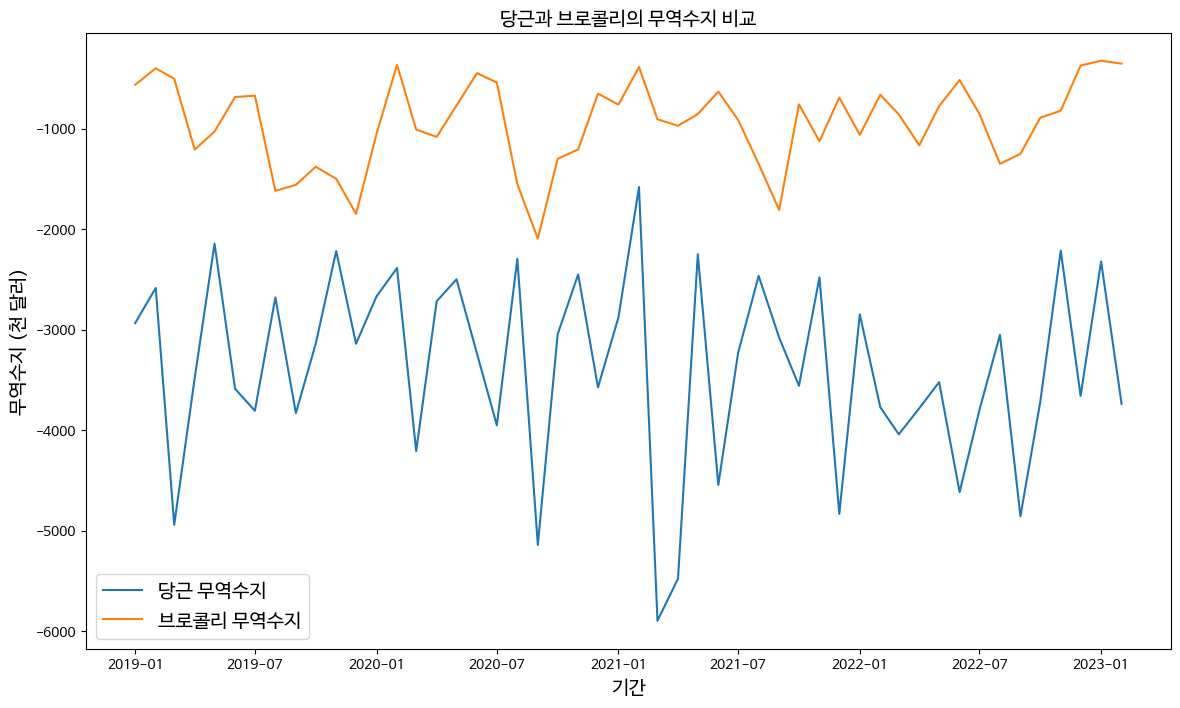

In [ ]:
# 당근과 브로콜리 데이터 필터링
items_of_interest = ['당근', '브로콜리']
filtered_data = data[data['품목명'].str.contains('|'.join(items_of_interest))]

# 기간을 datetime 형식으로 변환
filtered_data['기간'] = pd.to_datetime(filtered_data['기간'], format='%Y-%m')

# 무역수지 계산
filtered_data['무역수지'] = filtered_data['수출 금액'] - filtered_data['수입 금액']

# 데이터 요약 (기간별로 그룹화하고 합산)
summary_data = filtered_data.groupby(['기간', '품목명']).sum().reset_index()

# 시각화
plt.figure(figsize=(14, 8))

for item in items_of_interest:
    item_data = summary_data[summary_data['품목명'].str.contains(item)]
    plt.plot(item_data['기간'], item_data['무역수지'], label=f'{item} 무역수지')

plt.title('당근과 브로콜리의 무역수지 비교')
plt.xlabel('기간')
plt.ylabel('무역수지 (천 달러)')
plt.legend()
plt.show()